## Code to generate Figure 3B graphics
End-to-end distance distribtions were calculated per-replicate for a given peptide using soursop and the resulting distributions were merged to generate the plots in panel B.

This code loads csv files from 'data/'.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

In [5]:
## load csv files with end-to-end distances (Ree) from replicates ##
# 'reps' indicates the data are organized per-replicate (instead of merged)

TauS = np.loadtxt('data/TauS_Ree_reps.csv', delimiter = ',')
pTauS = np.loadtxt('data/pTauS_Ree_reps.csv', delimiter = ',')
TauT = np.loadtxt('data/TauT_Ree_reps.csv', delimiter = ',')
pTauT = np.loadtxt('data/pTauT_Ree_reps.csv', delimiter = ',')
TauE = np.loadtxt('data/TauE_Ree_reps.csv', delimiter = ',')

seqs = ['TauS', 'TauT', 'pTauS', 'pTauT', 'TauE']
all_Rees = [TauS, TauT, pTauS, pTauT, TauE]

In [6]:
## merge data across replicates and calculate average & std Ree for all peptides ##
# also perform some data management steps (put all peptide data into a dataframe for easy downstream analyis)

rep_avgs = []
cat_data = []
for j in range(0, len(seqs)):    
    replicate = all_Rees[j]
    rep_avgs.append(np.mean(replicate, axis = 1))
    
    cat_data.append(replicate.reshape(-1, 1))
    
avg_avg = []
avg_std = []
for b in range(0, len(rep_avgs)):
    avg_avg.append(np.mean(rep_avgs[b]))
    avg_std.append(np.std(rep_avgs[b]))
    
ave_round = np.round(avg_avg, 1)
std_round = np.round(avg_std, 1)

stack = np.column_stack([cat_data[0], cat_data[1], cat_data[2], cat_data[3], cat_data[4]])
Ree_dff = pd.DataFrame(stack, columns = seqs)

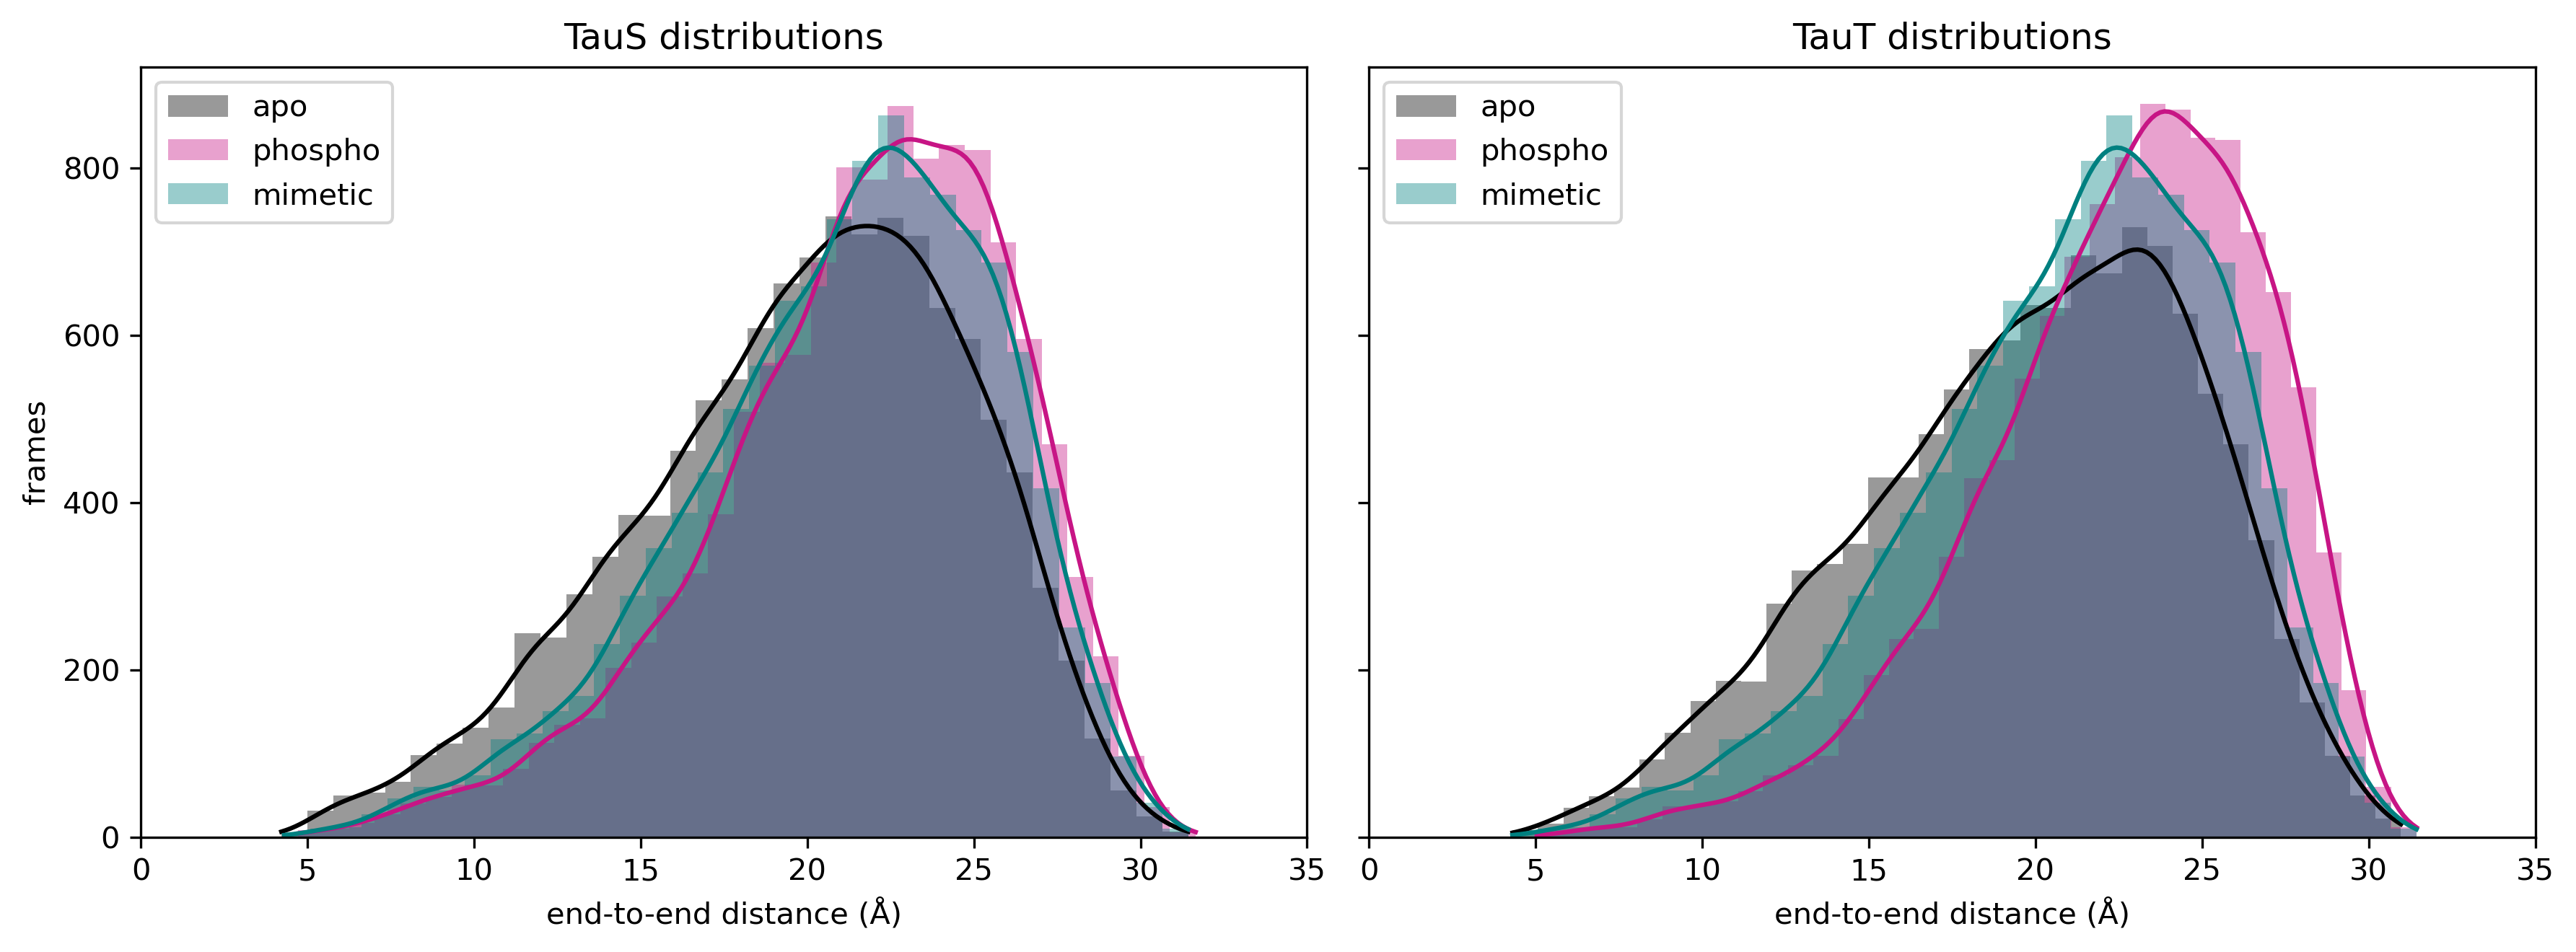

In [14]:
## generate Ree distribution graphics (PANEL B) ##

fig, axes = plt.subplots(1, 2, figsize = (12, 4.5), dpi = 300, sharey = True)

# plot TauS on left panel (axes[0])
sns.histplot(data=Ree_dff, ax = axes[0], x = "TauS", color = "k", alpha = 0.4, lw = 0, label="apo", fill = True, bins = 35, kde = True)
sns.histplot(data=Ree_dff, ax = axes[0], x = "pTauS", color = "mediumvioletred", lw = 0, alpha = 0.4, label="phospho", fill = True, bins = 35, kde = True)
sns.histplot(data=Ree_dff, ax = axes[0], x = "TauE", color = "teal", lw = 0, alpha = 0.4, label="mimetic", fill = True, bins = 35, kde = True)

# plot TauT on right panel (axes[1])
sns.histplot(data=Ree_dff, ax = axes[1], x = "TauT", color = "k", alpha = 0.4, lw = 0, label="apo", fill = True, bins = 35, kde = True)
sns.histplot(data=Ree_dff, ax = axes[1], x = "pTauT", color = "mediumvioletred", lw = 0, alpha = 0.4, label="phospho", fill = True, bins = 35, kde = True)
sns.histplot(data=Ree_dff, ax = axes[1], x = "TauE", color = "teal", lw = 0, alpha = 0.4, label="mimetic", fill = True, bins = 35, kde = True)

axes[0].set_ylabel('frames')
axes[0].set_xlabel('end-to-end distance (Å)')
axes[0].set_title('TauS distributions')
axes[0].legend(loc = 'upper left')
axes[0].set_xlim([0, 35])

axes[1].set_xlabel('end-to-end distance (Å)')
axes[1].set_title('TauT distributions')
axes[1].legend(loc = 'upper left')
axes[1].set_xlim([0, 35])

plt.tight_layout()

plt.savefig('Tau_Ree_dists_3B.pdf', format = 'pdf', dpi = 300)

plt.show()